# What can we estimate?

## Import stuff

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Load data

In [66]:
data = pd.read_csv('./tracker_ww_data.csv')

In [67]:
data.head()

,Unnamed: 0,Date,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,status
0,0,2018-06-18,837,6,89,12,9,0
1,1,2018-06-19,956,6,74,10,10,0
2,2,2018-06-20,975,7,67,12,6,0
3,3,2018-06-21,894,6,83,13,9,0
4,4,2018-06-22,895,6,77,14,8,0


#### Drop first extra column

In [68]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Date,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,status
0,2018-06-18,837,6,89,12,9,0
1,2018-06-19,956,6,74,10,10,0
2,2018-06-20,975,7,67,12,6,0
3,2018-06-21,894,6,83,13,9,0
4,2018-06-22,895,6,77,14,8,0


## Heatmap (correlation)

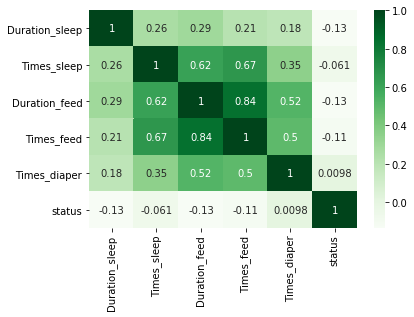

In [69]:
sns.heatmap(data.corr(), annot = True, cmap="Greens")

## Leap (status)

### Train/test split

Train set 70% and Test set 30%

#### Declare X & y

In [70]:
dep   = data['status']
indep = data

In [71]:
indep_train, indep_test, dep_train, dep_test = train_test_split(indep, dep, test_size = 0.3, random_state=24)

### Linear Regression

#### Function LinReg

In [72]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # standardize the predictors
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_s = ss.transform(X_train)
    X_test_s = ss.transform(X_test)
    
    # fit
    model.fit(X_train_s, y_train)
    
    # Evaluate: predict
    y_pred = model.predict(X_test_s)
    y_true = y_test
    
    mean_square_error = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    
    # Evaluate: score 
    score = model.score(X_test_s, y_test)
    
    return {'Score (R^2)': score.mean(), 'MSE': mean_square_error}

#### LinReg all variables

In [73]:
# define X and y
X_train = indep_train.drop(['status', 'Date'], axis=1)
y_train = dep_train #target (same as indep_train['status'])
X_test = indep_test.drop(['status','Date'], axis=1)
y_test = dep_test

# chose model 
model = LinearRegression()

# call function
evaluate_model(model, X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


{'Score (R^2)': 0.041995916193880885, 'MSE': 0.5782496143608804}

#### Importance of the coefficients

In [74]:
# Look at the feature importance of the variables
pd.Series(dict(zip(X_train.columns,model.coef_))).abs().sort_values(ascending=False)

Times_diaper      0.096659
Duration_feed     0.060003
Duration_sleep    0.055880
Times_feed        0.043374
Times_sleep       0.040723
dtype: float64

Note: Non of them seem good to use...as we saw when we looked at correlations in other notebook

******************************************************************************************

## Duration sleep

### Train/test split

Train set 70% and Test set 30%

#### Declare X & y

In [75]:
dep1   = data['Duration_sleep']
indep1 = data

In [76]:
indep1_train, indep1_test, dep1_train, dep1_test = train_test_split(indep1, dep1, test_size = 0.3, random_state=24)

### Linear Regression

In [77]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # standardize the predictors
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_s = ss.transform(X_train)
    X_test_s = ss.transform(X_test)
    
    # fit
    model.fit(X_train_s, y_train)
    
    # Evaluate: predict
    y_pred = model.predict(X_test_s)
    y_true = y_test
    
    mean_square_error = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    
    # Evaluate: score 
    score = model.score(X_test_s, y_test)
    
    return {'Score (R^2)': score.mean(), 'MSE': mean_square_error}

#### LinReg all variables

In [78]:
# define X and y
X_train1 = indep1_train.drop(['Duration_sleep', 'Date'], axis=1)
y_train1 = dep1_train #target (same as indep1_train['Duration_sleep'])
X_test1 = indep1_test.drop(['Duration_sleep','Date'], axis=1)
y_test1 = dep1_test

# chose model 
model = LinearRegression()

# call function
evaluate_model(model, X_train1, X_test1, y_train1, y_test1)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


{'Score (R^2)': 0.05844277616534078, 'MSE': 126.06652742756164}

#### Importance of the coefficients

In [79]:
# Look at the feature importance of the variables
pd.Series(dict(zip(X_train1.columns,model.coef_))).abs().sort_values(ascending=False)

Duration_feed    34.077668
Times_sleep      28.177851
Times_feed       15.043820
status            9.789337
Times_diaper      4.820510
dtype: float64

Note: Remove either Times_feed or Duration_feed due to high correlation between independent variables. Might overfit model?

#### LinReg without Times_feed

In [80]:
# define X and y
X_train2 = indep1_train.drop(['Duration_sleep', 'Date', 'Times_feed'], axis=1)
y_train2 = dep1_train #target (same as indep1_train['Duration_sleep'])
X_test2 = indep1_test.drop(['Duration_sleep','Date', 'Times_feed'], axis=1)
y_test2 = dep1_test

# chose model 
model = LinearRegression()

# call function
evaluate_model(model, X_train2, X_test2, y_train2, y_test2)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


{'Score (R^2)': 0.029915196943606004, 'MSE': 127.96207705069325}

### Random Forest regressor

You do not have to scale a Random Forest. 

In [81]:
def get_best_hype(model, grid, X_train, y_train):  
    # Best Hyperparameters
    gs = GridSearchCV(model, grid)
    
    # fit
    gs.fit(X_train, y_train)
     
    return {'best_score': gs.best_score_,'best_params': gs.best_params_} 

def evaluate_model2(model, X_train, X_test, y_train, y_test):
    # fit
    model.fit(X_train, y_train)
    
    # Evaluate: predict
    y_pred = model.predict(X_test)
    y_true = y_test
    
    mean_square_error = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    
    # Evaluate: score
    score = model.score(X_test, y_test)
    
    return {'Score (R^2)': score.mean(), 'MSE': mean_square_error}

#### RandomForestRegressor all varables

In [83]:
# define X and y
X_train3 = indep1_train.drop(['Duration_sleep', 'Date'], axis=1)
y_train3 = dep1_train #target (same as indep1_train['Duration_sleep'])
X_test3 = indep1_test.drop(['Duration_sleep','Date'], axis=1)
y_test3 = dep1_test

# Gridsearch
grid = {'n_estimators': np.arange(1, 10),
        'max_depth': np.arange(1, 10),
        'max_features' : ('auto', 'sqrt', 'log2', None),
        'bootstrap': (True, False),
        'verbose' : np.arange(0, 1)}

rfr = RandomForestRegressor(random_state=24)

get_best_hype(rfr, grid, X_train3, y_train3)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'best_score': 0.09974367480983642,
 'best_params': {'bootstrap': True,
  'max_depth': 2,
  'max_features': 'sqrt',
  'n_estimators': 2,
  'verbose': 0}}

In [84]:
# chose model and use best hyperparameters (from gridsearchCV)
model = RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=1, verbose=0, bootstrap=False, 
                               random_state=24)

# call function
evaluate_model2(rfr, X_train3, X_test3, y_train3, y_test3)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Score (R^2)': 0.03871578494179795, 'MSE': 127.38032004855584}

#### Feature importances

In [85]:
pd.Series(dict(zip(X_train3.columns,rfr.feature_importances_))).abs().sort_values(ascending=False)

Duration_feed    0.442388
Times_sleep      0.178243
Times_diaper     0.168632
Times_feed       0.155274
status           0.055463
dtype: float64